In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
import os
from sklearn import svm
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, average_precision_score, f1_score, recall_score, precision_score

%config Completer.use_jedi = False

In [2]:
def ls(path):
    files =  os.listdir(path)
    return [os.path.join(path,x) for x in files]

positive_files = ls("./dataset/positive/")
negative_files = ls("./dataset/negative/")

split_pos = int(0.7*len(positive_files))
split_neg = int(0.7*len(negative_files))

train_positive, test_positive =  positive_files[:split_pos],positive_files[split_pos:]
train_negative, test_negative =  negative_files[:split_neg],negative_files[split_neg:]

train_positive = [cv.imread(img)[:,:,::-1] for img in train_positive]
train_negative = [cv.imread(img)[:,:,::-1] for img in train_negative]

test_positive = [cv.imread(img)[:,:,::-1] for img in test_positive]
test_negative = [cv.imread(img)[:,:,::-1] for img in test_negative]

In [3]:
def feature_extraction(img, ppc = 8, cpb = 2):
    return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichannel=True)

# Training Samples
train_positive_hog = [feature_extraction(img) for img in train_positive]
train_negative_hog = [feature_extraction(img) for img in train_negative]
train_positive_hog = np.array(train_positive_hog)
train_negative_hog = np.array(train_negative_hog)

# Testing Samples
test_positive_hog = [feature_extraction(img) for img in test_positive]
test_negative_hog = [feature_extraction(img) for img in test_negative]
test_positive_hog = np.array(test_positive_hog)
test_negative_hog = np.array(test_negative_hog)

C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichannel=True)


In [4]:
# Combine positive and negative samples
X = np.concatenate((train_positive_hog,train_negative_hog))
X_test = np.concatenate((test_positive_hog,test_negative_hog))

# Create labels
Y = np.zeros(len(X))
Y[:len(train_positive_hog)] = 0
Y[len(train_positive_hog):] = 1


Y_test = np.zeros(len(X_test))
Y_test[:len(test_positive_hog)] = 0
Y_test[len(test_positive_hog):] = 1

In [5]:
svc = svm.LinearSVC(C=0.6,max_iter=10000)
svc.fit(X,Y)

LinearSVC(C=0.6, max_iter=10000)

In [6]:
Y_pred = svc.predict(X_test)
print("AP:", average_precision_score(Y_test,Y_pred))
print("Accuracy:", accuracy_score(Y_test,Y_pred))
print("Recall:", recall_score(Y_test,Y_pred))
print("Precision:", precision_score(Y_test,Y_pred))
print("F1:", f1_score(Y_test,Y_pred))

AP: 0.9256036283199668
Accuracy: 0.9321774604793472
Recall: 0.9530744336569579
Precision: 0.9401436552274541
F1: 0.9465648854961832


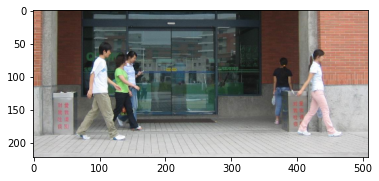

In [7]:
img = cv.imread("./Images/FudanPed00036.png")[:,:,::-1]
scale = 0.5
img = cv.resize(img, (int(scale*img.shape[1]),int(scale*img.shape[0]))) 
plt.imshow(img)
plt.show()

In [8]:
height, width = 128, 64
def detect(img, svc, step = 10, height = 128, width = 64):
    
    # Iterate over image and apply classifier
    result = np.zeros(img.shape[:2])-1
    for i in range(0,img.shape[0]-height, step):
        for j in range(0,img.shape[1]-width, step):
            result[i,j] = svc.predict(feature_extraction(img[i:i+height,j:j+width]).reshape(1, -1))[0]
    
    y,x = np.nonzero(result==0)
    bounding_boxes = np.stack([x,y,x+width,y+height],1)
    return result, bounding_boxes
            
result, bounding_boxes = detect(img, svc)

C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichannel=True)
C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichannel=True)
C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichanne

C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichannel=True)
C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichannel=True)
C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichanne

C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichannel=True)
C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichannel=True)
C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichanne

C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichannel=True)
C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichannel=True)
C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichanne

C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichannel=True)
C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichannel=True)
C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichanne

C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichannel=True)
C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichannel=True)
C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichanne

C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichannel=True)
C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichannel=True)
C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichanne

C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichannel=True)
C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichannel=True)
C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichanne

C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichannel=True)
C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichannel=True)
C:\Users\Cybaster\AppData\Local\Temp/ipykernel_17896/885632129.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(img, orientations=8, pixels_per_cell=(ppc, ppc), cells_per_block=(cpb, cpb), visualize=False, multichanne

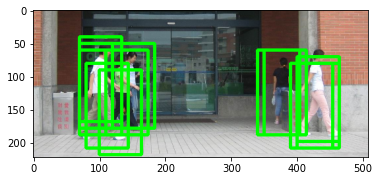

In [9]:
res = img.copy()
for i in range(len(bounding_boxes)):
    res = cv.rectangle(res.astype(np.float32),(bounding_boxes[i,0],bounding_boxes[i,1]),(bounding_boxes[i,2],bounding_boxes[i,3]),(0,255,0),3).astype(np.uint8)
plt.imshow(res)

In [10]:
def non_max_suppression_fast(boxes, overlapThresh):
    if len(boxes) == 0:
        return []
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")

    pick = []
    x1 = boxes[:,0]
    y1 = boxes[:,1]
    x2 = boxes[:,2]
    y2 = boxes[:,3]
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)
    
    while len(idxs) > 0:
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)
        
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        overlap = (w * h) / area[idxs[:last]]
        idxs = np.delete(idxs, np.concatenate(([last],
            np.where(overlap > overlapThresh)[0])))
    return boxes[pick].astype("int")

In [11]:
bounding_boxes = non_max_suppression_fast(bounding_boxes, 0.5)

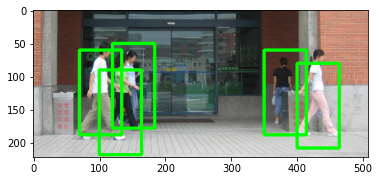

In [12]:
res = img.copy()
for i in range(len(bounding_boxes)):
    res = cv.rectangle(res.astype(np.float32),(bounding_boxes[i,0],bounding_boxes[i,1]),(bounding_boxes[i,2],bounding_boxes[i,3]),(0,255,0),3).astype(np.uint8)
plt.imshow(res)